In [8]:
import sys
print("Python version: {}".format(sys.version))
import pandas as pd
print("pandas version: {}".format(pd.__version__))
import matplotlib
import matplotlib.pyplot as plt
print("matplotlib version: {}".format(matplotlib.__version__))
import numpy as np
print("NumPy version: {}".format(np.__version__))
import scipy as sp
print("SciPy version: {}".format(sp.__version__))
import IPython
print("IPython version: {}".format(IPython.__version__))
import sklearn
print("scikit-learn version: {}".format(sklearn.__version__))
import mglearn

Python version: 3.11.7 | packaged by Anaconda, Inc. | (main, Dec 15 2023, 18:05:47) [MSC v.1916 64 bit (AMD64)]
pandas version: 2.0.3
matplotlib version: 3.7.2
NumPy version: 1.23.5
SciPy version: 1.10.1
IPython version: 8.20.0
scikit-learn version: 1.2.2


### Decision Trees

These questions are similar to the questions you might ask in a game of 20 Questions.
Imagine you want to distinguish between the following four animals: bears, hawks,
penguins, and dolphins. Your goal is to get to the right answer by asking as few if/else
questions as possible. You might start off by asking whether the animal has feathers, a
question that narrows down your possible animals to just two. If the answer is “yes,”
you can ask another question that could help you distinguish between hawks and
penguins. For example, you could ask whether the animal can fly. If the animal
doesn’t have feathers, your possible animal choices are dolphins and bears, and you
will need to ask a question to distinguish between these two animals—for example,
asking whether the animal has fins.

# Building decision trees

Learning a decision tree means learning the sequence of if/else questions that gets us
to the true answer most quickly. In the machine learning setting, these questions are
called tests (not to be confused with the test set, which is the data we use to test to see
how generalizable our model is). Usually data does not come in the form of binary
yes/no features as in the animal example, but is instead represented as continuous
features such as in the 2D dataset shown in Figure 2-23. The tests that are used on
continuous data are of the form “Is feature i larger than value a?”


#  decision tree for classification using the Iris dataset.

In [9]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
import matplotlib.pyplot as plt

In [11]:
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, stratify = cancer.target, random_state = 42)
tree = DecisionTreeClassifier(random_state = 0)
tree.fit(X_train, y_train)
print("Accuracy on training set: {:.3f}".format(tree.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set: 1.000
Accuracy on test set: 0.937


As expected, the accuracy on the training set is 100%—because the leaves are pure,
the tree was grown deep enough that it could perfectly memorize all the labels on the
training data. The test set accuracy is slightly worse than for the linear models we
looked at previously, which had around 95% accuracy.


In [15]:
tree = DecisionTreeClassifier(max_depth = 4, random_state = 0)
tree.fit(X_train, y_train)

print("Accuracy on training set : {:.3f}".format(tree.score(X_train, y_train))) 
print("Accuracy on test set : {:.3f}".format(tree.score(X_test, y_test)))

Accuracy on training set : 0.988
Accuracy on test set : 0.951


### Analyzing decision trees

We can visualize the tree using the export_graphviz function from the tree module.
This writes a file in the .dot file format, which is a text file format for storing graphs.


In [16]:
from sklearn.tree import export_graphviz
export_graphviz(tree, out_file="tree.dot", class_names=["malignant", "benign"],
       feature_names=cancer.feature_names, impurity=False, filled=True)

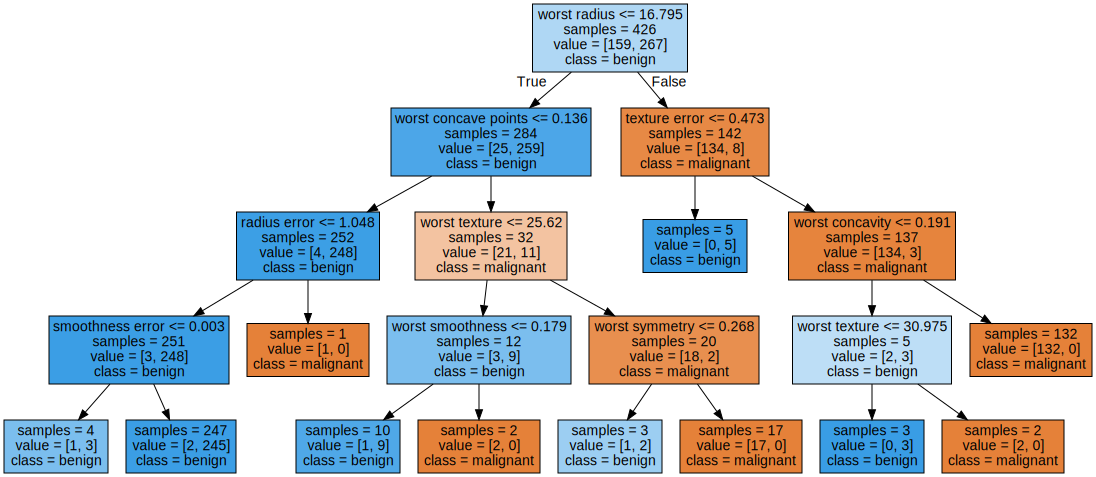

In [18]:
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

### Feature importance in trees

Instead of looking at the whole tree, which can be taxing, there are some useful prop‐
erties that we can derive to summarize the workings of the tree. The most commonly
used summary is feature importance, which rates how important each feature is for
the decision a tree makes. It is a number between 0 and 1 for each feature, where 0
means “not used at all” and 1 means “perfectly predicts the target.” The feature
importances always sum to 1:


In [19]:
print("Feature importance:\n{}".format(tree.feature_importances_))

Feature importance:
[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.01019737 0.04839825
 0.         0.         0.0024156  0.         0.         0.
 0.         0.         0.72682851 0.0458159  0.         0.
 0.0141577  0.         0.018188   0.1221132  0.01188548 0.        ]


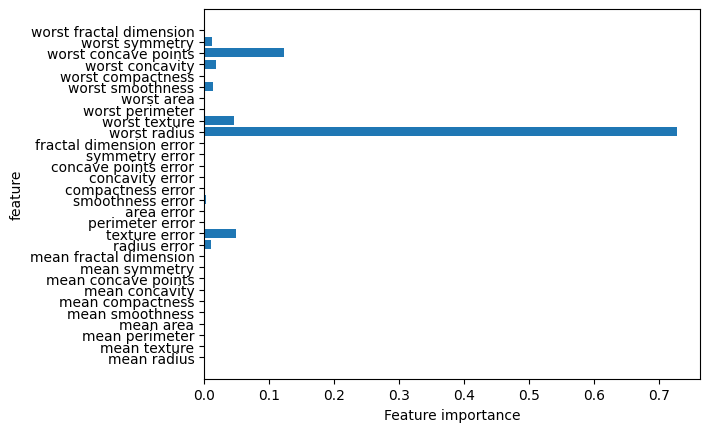

In [20]:
def plot_feature_importance_cancer(model):
        n_features = cancer.data.shape[1]
        plt.barh(range(n_features), model.feature_importances_, align = 'center')
        plt.yticks(np.arange(n_features), cancer.feature_names)
        plt.xlabel("Feature importance")
        plt.ylabel("feature")
        
plot_feature_importance_cancer(tree)

Here we see that the feature used in the top split (“worst radius”) is by far the most
important feature. This confirms our observation in analyzing the tree that the first
level already separates the two classes fairly well.
However, if a feature has a low feature_importance, it doesn’t mean that this feature
is uninformative. It only means that the feature was not picked by the tree, likely
because another feature encodes the same information.
In contrast to the coefficients in linear models, feature importances are always posi‐
tive, and don’t encode which class a feature is indicative of. The feature importances
tell us that “worst radius” is important, but not whether a high radius is indicative of a
sample being benign or malignant. In fact, there might not be such a simple relation‐
ship between features and class, as you can see in the following example (Figures 2-29
and 2-30):
